In [94]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/datasets/pima-indians-diabetes.csv')

In [96]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [97]:
print(data.shape)

(767, 9)


In [98]:
# Assign column names
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']


In [99]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64


In [100]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [101]:
zero_counts = (data == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                       500
dtype: int64


# Handling Null Values

In [102]:
import numpy as np
from sklearn.impute import SimpleImputer

data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')

# Fit and transform the relevant columns to replace NaNs with the median
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])



In [103]:
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1     85.0           66.0           29.0    125.0  26.6   
1            8    183.0           64.0           29.0    125.0  23.3   
2            1     89.0           66.0           23.0     94.0  28.1   
3            0    137.0           40.0           35.0    168.0  43.1   
4            5    116.0           74.0           29.0    125.0  25.6   

   DiabetesPedigreeFunction  Age  Class  
0                     0.351   31      0  
1                     0.672   32      1  
2                     0.167   21      0  
3                     2.288   33      1  
4                     0.201   30      0  


In [13]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64


In [104]:
class_counts = data['Class'].value_counts()
print(class_counts)

Class
0    500
1    267
Name: count, dtype: int64


In [105]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

# standardizing feature

In [106]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(data[features])

scaled_data = pd.DataFrame(scaled_features, columns=features)
scaled_data['Class'] = data['Class'].values

print(scaled_data.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
1     0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
2     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
3     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
4     0.294118  0.464516       0.510204       0.239130  0.133413  0.151329   

   DiabetesPedigreeFunction       Age  Class  
0                  0.116567  0.166667      0  
1                  0.253629  0.183333      1  
2                  0.038002  0.000000      0  
3                  0.943638  0.200000      1  
4                  0.052519  0.150000      0  


# DATA SPLITING

In [107]:
from sklearn.model_selection import train_test_split
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = scaled_data[feature_cols] # Features
y = scaled_data['Class'] # Target variable

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
1,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
2,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
3,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
4,0.294118,0.464516,0.510204,0.239130,0.133413,0.151329,0.052519,0.150000
...,...,...,...,...,...,...,...,...
762,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
763,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000
764,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
765,0.058824,0.529032,0.367347,0.239130,0.133413,0.243354,0.115713,0.433333


In [108]:
y

,Class
0,0
1,1
2,0
3,1
4,0
...,...
762,0
763,0
764,0
765,1


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1293) # 80% training and 20% test

In [110]:
X_train.shape


(613, 8)

In [111]:
X_test.shape

(154, 8)

# Perceptron

In [112]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

perceptron = Perceptron(random_state=1293)

perceptron.fit(X_train, y_train)

Perceptron(random_state=1293)

In [113]:
y_pred = perceptron.predict(X_test)


In [114]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [116]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


In [117]:
#  classification report
print("Perceptron Classification Report:")
print(classification_report(y_test, y_pred))

Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        94
           1       0.78      0.23      0.36        60

    accuracy                           0.68       154
   macro avg       0.72      0.60      0.57       154
weighted avg       0.71      0.68      0.62       154



In [118]:
print("Perceptron Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Perceptron Confusion Matrix:
[[90  4]
 [46 14]]


Text(0.5, 1.0, 'Confusion Matrix for Perceptron')

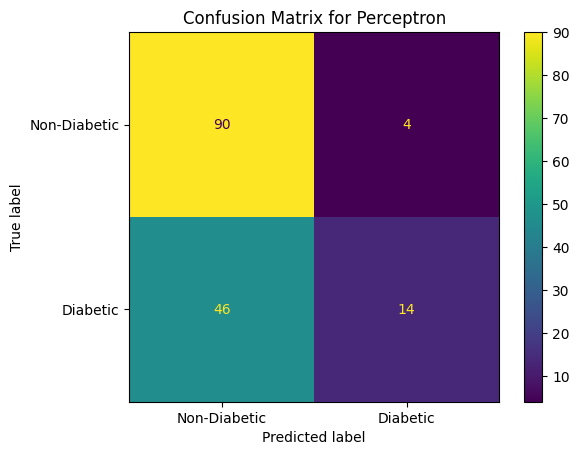

In [119]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, f1_score)
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot();
plt.title('Confusion Matrix for Perceptron')


# MLP

MLP Classifier Accuracy: 0.7987
MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        94
           1       0.80      0.65      0.72        60

    accuracy                           0.80       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.80      0.79       154

MLP Classifier Confusion Matrix:
[[84 10]
 [21 39]]


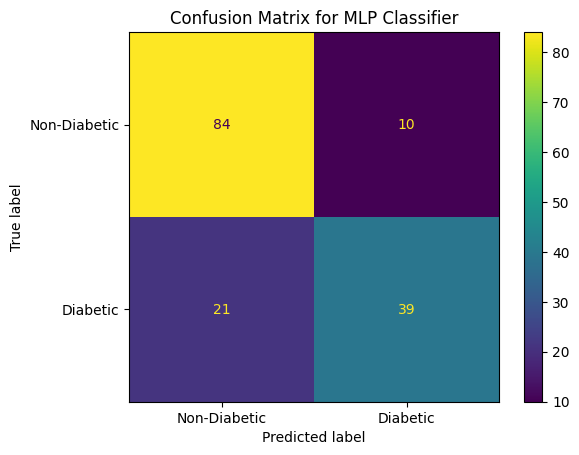

In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=1293)
mlp_classifier.fit(X_train, y_train)

y_pred_mlp = mlp_classifier.predict(X_test)

#Accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy_mlp:.2f}")

# Classification Report
print("MLP Classifier Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLP Classifier Confusion Matrix:")
print(conf_matrix_mlp)

# Display Confusion Matrix
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mlp, display_labels=['Non-Diabetic', 'Diabetic'])
disp_mlp.plot()
plt.title('Confusion Matrix for MLP Classifier')
plt.show()


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(random_state=1293)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')

# classification report
classification_report_logistic = classification_report(y_test, y_pred_logistic)
print('Logistic Regression Classification Report:')
print(classification_report_logistic)

# confusion matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix_logistic)


Logistic Regression Accuracy: 0.77
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        94
           1       0.82      0.52      0.63        60

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.77      0.75       154

Logistic Regression Confusion Matrix:
[[87  7]
 [29 31]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

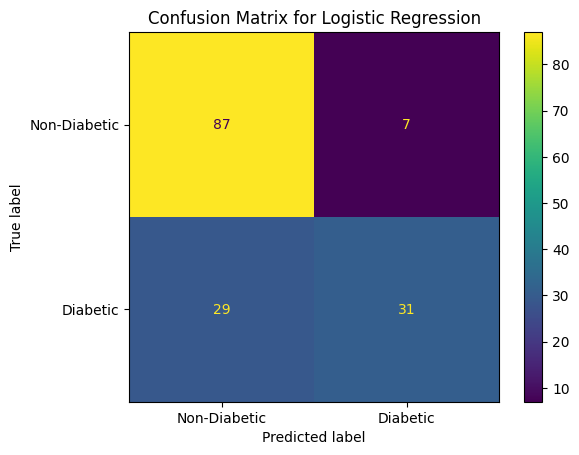

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_logistic = confusion_matrix(y_test, y_pred_logistic, labels=[0, 1])

disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['Non-Diabetic', 'Diabetic'])
disp_logistic.plot()
plt.title('Confusion Matrix for Logistic Regression')



# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=1293)

dt_classifier.fit(X_train, y_train)





DecisionTreeClassifier(random_state=1293)

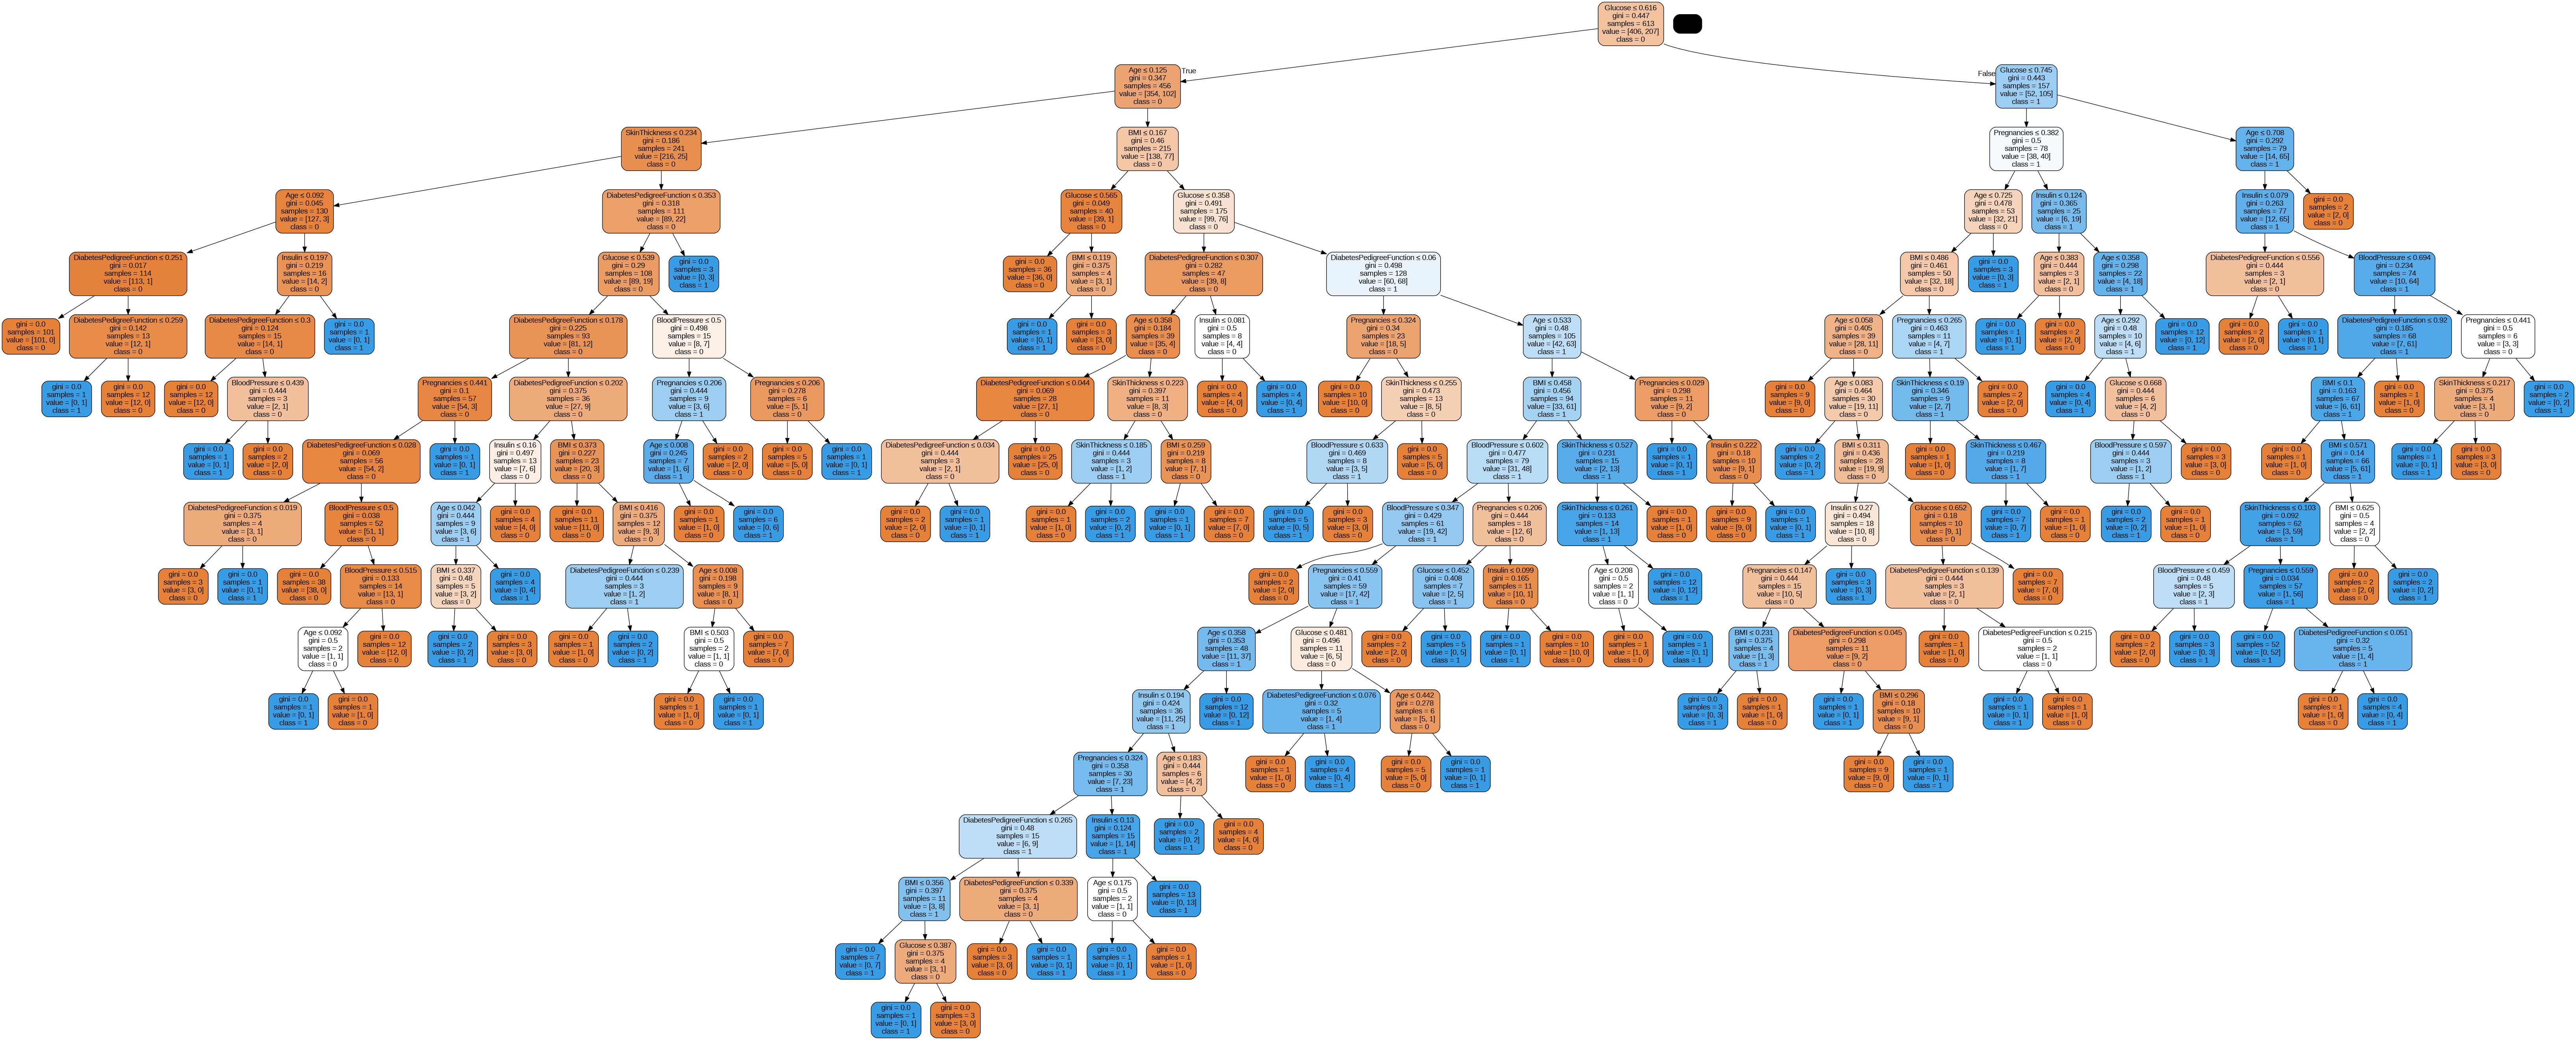

In [92]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from six import StringIO

# Define feature and class names
feature_cols = X_train.columns  # Assuming X_train is a DataFrame
class_names = ['0', '1']  # Assuming binary classification

# Export the decision tree to DOT format
dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=class_names)

# Create a graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the tree image
graph.write_png('decision_tree.png')

# Display the tree image
Image(graph.create_png())

In [93]:
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

clf_report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:")
print(clf_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Decision Tree Confusion Matrix:")
print(conf_matrix)

Decision Tree Accuracy: 0.66
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        94
           1       0.57      0.57      0.57        60

    accuracy                           0.66       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.66      0.66      0.66       154

Decision Tree Confusion Matrix:
[[68 26]
 [26 34]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

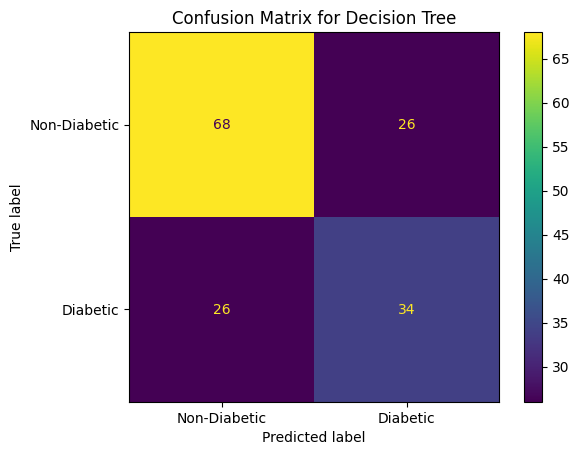

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Non-Diabetic', 'Diabetic'])
disp_dt.plot()
plt.title('Confusion Matrix for Decision Tree')



# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(random_state=1293)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

clf_report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:")
print(clf_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:")
print(conf_matrix)

Random Forest Accuracy: 0.79
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        94
           1       0.78      0.63      0.70        60

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.78      0.79      0.78       154

Random Forest Confusion Matrix:
[[83 11]
 [22 38]]


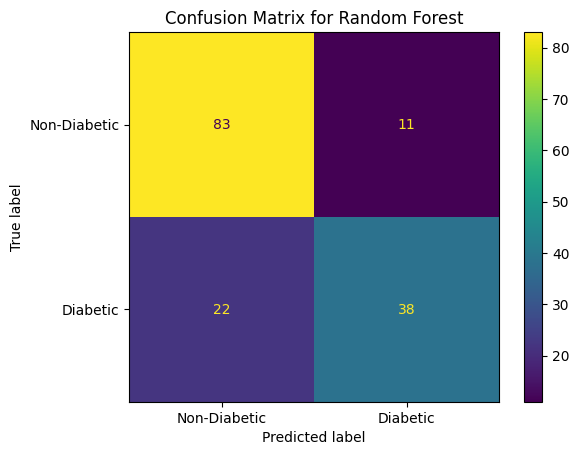

In [37]:
cm_rf = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Non-Diabetic', 'Diabetic'])
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

# ADALINE


In [64]:
from sklearn.linear_model import SGDClassifier

adaline = SGDClassifier(loss='squared_error', max_iter=1000, random_state=1293)
adaline.fit(X_train, y_train)

# Predict and evaluate
y_pred = adaline.predict(X_test)
print("Adaline Model")
print(f" Adaline Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Adaline Model
 Adaline Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        94
           1       0.71      0.67      0.69        60

    accuracy                           0.77       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.76      0.77      0.76       154

[[78 16]
 [20 40]]


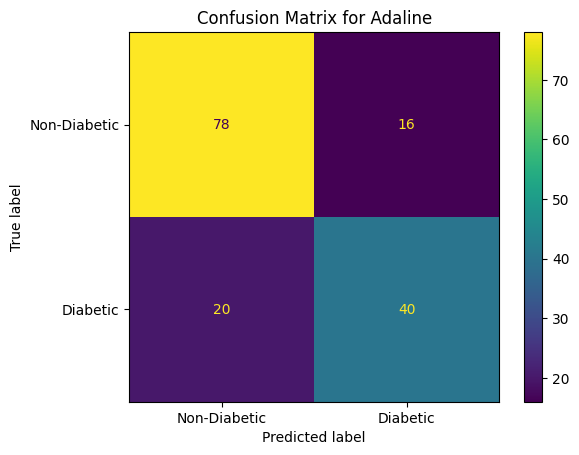

In [65]:
cm_adaline = confusion_matrix(y_test, y_pred, labels=[0, 1])

disp_adaline = ConfusionMatrixDisplay(confusion_matrix=cm_adaline, display_labels=['Non-Diabetic', 'Diabetic'])
disp_adaline.plot()
plt.title('Confusion Matrix for Adaline')
plt.show()